# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Tegas Gagas Impian P N
- Cita-cita semasa kecil: Pilot

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

print('Initiation success')
# please import as much as you need

Initiation success


In [2]:
# read your data

r = r'WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(r)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## 1. Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [3]:
# your code goes here!
# make aggregation

MC_avg = df.groupby(['PaymentMethod'])['MonthlyCharges'].mean().round(2).reset_index()
MC_avg = MC_avg.sort_values('MonthlyCharges', ascending = False).reset_index(drop = 'index')
MC_avg.columns = ['Payment Method', 'Monthly Charges Average']

MC_avg

,Payment Method,Monthly Charges Average
0,Electronic check,76.26
1,Bank transfer (automatic),67.19
2,Credit card (automatic),66.51
3,Mailed check,43.92


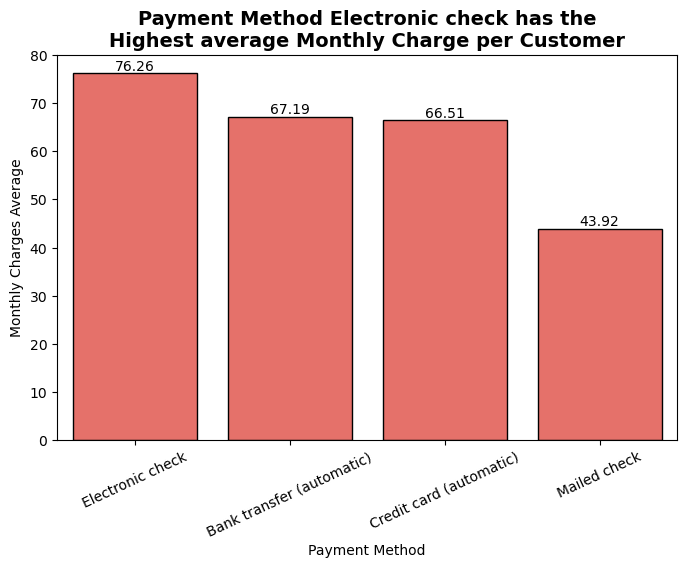

In [4]:
# barplot for categorical data

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.barplot(x = 'Payment Method', y = 'Monthly Charges Average', data = MC_avg, 
            color = '#FA5F55', 
            lw = 1, ec = 'k')

ax.set_title('Payment Method Electronic check has the\nHighest average Monthly Charge per Customer', 
             fontsize = 14, weight = 'bold')

plt.xticks(rotation = 25)

# add annotation

for i in ax.containers:
    ax.bar_label(i)

Jadi, dari plot di atas, dapat disimpulkan bahwa *payment method* dengan *monthly charge* terbesar per customer yaitu  **Electronic check** dan *payment method* dengan *monthly charge* terkecil yaitu  **Mailed check**

## 2. Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [5]:
# your code goes here!
# grouping user by tenure

def tenure_stat(x):
    if x < 21:
        return 'low_tenure'
    elif x < 40:
        return 'medium_tenure'
    return 'high_tenure'

# add tenure group column

df['tenure group'] = df['tenure'].apply(lambda x: tenure_stat(x))

# count total customers for every tenure group criteria

cust_by_tenure = df.groupby('tenure group').agg({'customerID' : 'nunique'}).reset_index()
cust_by_tenure.columns = ['Tenure Group', 'Total Unique Customer']

cust_by_tenure

,Tenure Group,Total Unique Customer
0,high_tenure,2821
1,low_tenure,2878
2,medium_tenure,1344


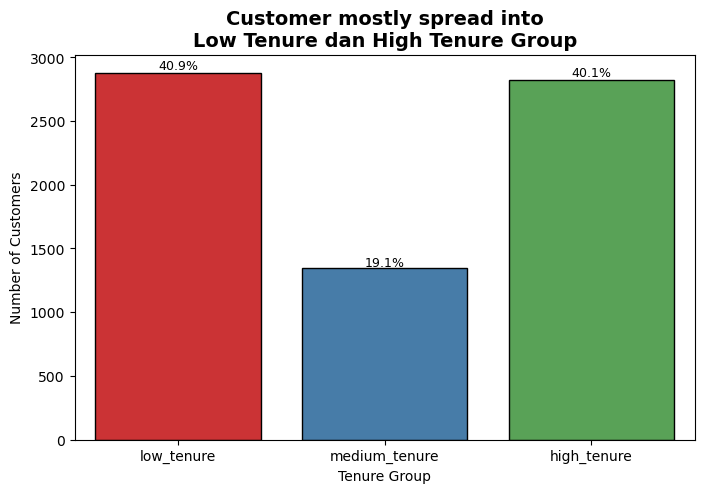

In [6]:
# create barplot
ls = ['low_tenure','medium_tenure','high_tenure']

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.barplot(x = 'Tenure Group', y = 'Total Unique Customer', data = cust_by_tenure,
            palette = 'Set1', order = ls, 
            lw = 1, ec = 'k')

ax.set_title('Customer mostly spread into\nLow Tenure dan High Tenure Group', fontsize = 14, weight = 'bold')
ax.set_ylabel('Number of Customers')

# add annotation

for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/cust_by_tenure.loc[:,'Total Unique Customer'].sum())
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() * 1.01
    ax.annotate(percentage, (x, y), ha='center', size=9, color='black');

Jadi, dari plot di atas, kami menyimpulkan bahwa pelanggan paling banyak berada pada kategori `low_tenure` (< 21 bulan) dengan jumlah 40,9% (2878), kemudian pelanggan paling sedikit berada pada kategori `medium_tenure` (21 - 40 bulan) dengan jumlah 19,1% (1344).

## 3. Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [7]:
# your code goes here!

# groupping total customer by senior citizen status and phone service status

senior_phone = df.groupby(['SeniorCitizen', 'PhoneService']).agg({'customerID' : 'nunique'}).reset_index()
senior_phone.columns = ['Senior Status', 'Phone Service Status', 'Total Unique Customer']

senior_unique = df.groupby(['SeniorCitizen']).agg({'customerID' : 'nunique'}).reset_index()
senior_unique.columns = ['Senior Status', 'All Total Unique Customer']

df_merge = senior_phone.merge(senior_unique, how = 'inner', on = 'Senior Status')

# add percetage ratio column

df_merge['Percentage Ratio'] = round((df_merge['Total Unique Customer']/df_merge['All Total Unique Customer'])*100, 2)

# change senior status column content

df_merge.loc[[0,1], 'Senior Status'] = 'Non-Senior Citizen'
df_merge.loc[[2,3], 'Senior Status'] = 'Senior Citizen'

df_merge

,Senior Status,Phone Service Status,Total Unique Customer,All Total Unique Customer,Percentage Ratio
0,Non-Senior Citizen,No,578,5901,9.79
1,Non-Senior Citizen,Yes,5323,5901,90.21
2,Senior Citizen,No,104,1142,9.11
3,Senior Citizen,Yes,1038,1142,90.89


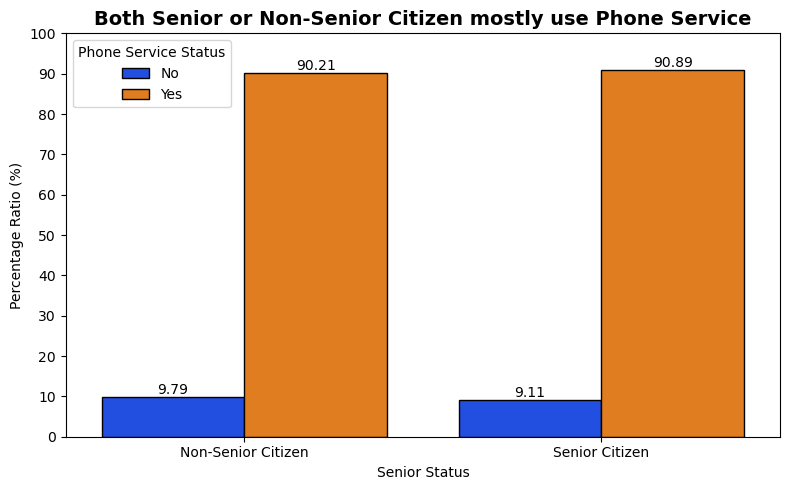

In [8]:
# create barplot

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.barplot(x = 'Senior Status', y = 'Percentage Ratio', data = df_merge,
            hue = 'Phone Service Status', palette = 'bright', 
            lw = 1, ec = 'k')

ax.set_title('Both Senior or Non-Senior Citizen mostly use Phone Service', fontsize = 14, weight = 'bold')
ax.set_ylabel('Percentage Ratio (%)')
ax.set_yticks(np.arange(0, 101, 10))

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa **persentase** antara pelanggan yang berlangganan telepon dan yang tidak berlangganan **hampir sama** untuk yang berstatus warga senior maupun tidak. Kemudian **90,89%** warga senior masih menggunakan layanan telepon. 

Dari sini dapat disimpulkan bahwa status warga senior ataupun bukan, tidak berpengaruh terhadap penggunaan layanan telepon.

## 4. Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [9]:
# your code goes here!
# change data type for TotalCharge column

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# drop null data

tc_dist = df.dropna()

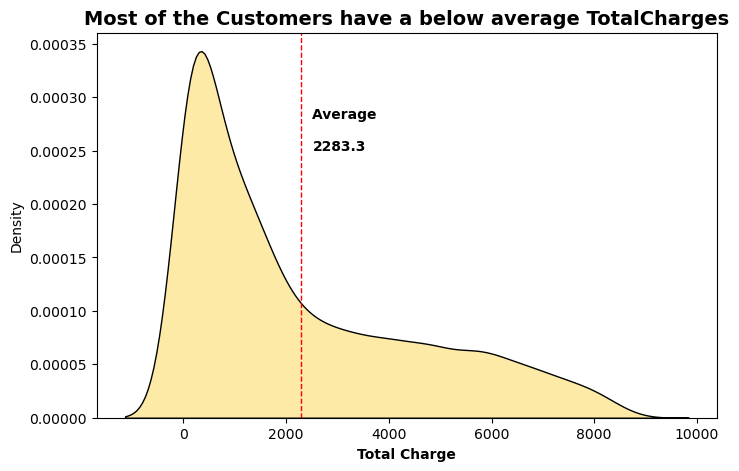

In [10]:
# create distribution plot

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.kdeplot(x = 'TotalCharges', data = tc_dist, label = 'Churn Yes', 
            color = '#fde488', fill = True, multiple = 'stack', ax = ax)

ax.set_title('Most of the Customers have a below average TotalCharges', fontsize = 14, weight = 'bold')
ax.set_xlabel('Total Charge',  weight = 'bold')
ax.set_ylabel('Density')

# add constant lines for mean

mean = np.mean(tc_dist['TotalCharges'])
ax.axvline(mean, c = 'r', ls = '--', lw = 1)
ax.text(mean*1.1, 2.5e-4, s = f'Average \n\n{round(mean,1)}', weight = 'bold')

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa distribusi biaya total yang harus dibayar untuk para pelanggan (baik yang churn ataupun tidak) memusat di bawah rata-rata (2300). Namun pada distribusi ditemukan bahwa pelanggan mayoritas membayar biaya total sebesar 20 - 300. Hal ini dapat menjadi *insight* dimungkinkan adanya subsidi terhadap biaya total yang dibayarkan pelanggan.

Distribusi biaya total memiliki bentuk miring positif (Mean > Median) sehingga dimungkinkan memiliki data *outlier*, sehingga untuk mengolah statistik sebaiknya menguunakan nilai median. 

# Intermediate

## 5. Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

In [11]:
# your code goes here!
# split the dataset based on churn customer

ch_y = df[df['Churn'] == 'Yes']
ch_n = df[df['Churn'] == 'No']

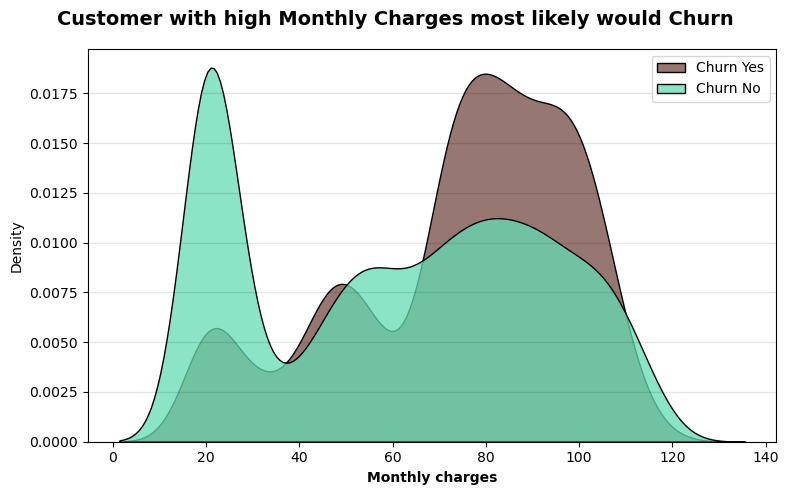

In [12]:
# create distribution plot

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.kdeplot(x = 'MonthlyCharges', data = ch_y, label = 'Churn Yes', 
            color = '#734941', fill = True, multiple = 'stack', ax = ax)

sns.kdeplot(x = 'MonthlyCharges', data = ch_n, label = 'Churn No',
            color = '#65dcb4', fill = True, multiple = 'stack', ax = ax)

fig.suptitle("Customer with high Monthly Charges most likely would Churn", fontsize=14, weight = 'bold')

ax.grid(c = 'black', lw = 1, axis = 'y', alpha = 0.1)
ax.set_xlabel('Monthly charges',  weight = 'bold')
ax.legend()

plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa **pelanggan yang churn** dominan memiliki nilai tagihan bulanan sekitar **70-110** sedangkan untuk **pelanggan yang tidak churn** memiliki tagihan bulanan sekitar **20**. Sehingga Cust yang memiliki tagihan bulanan tinggi **cenderung akan churn** jika tidak diberikan penanganan khusus, misal diberikan bundling promo atau bonus.

## 6. Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [13]:
# your code goes here!
# get combination of partner-dependents

pd_dist = df.copy()

pd_dist['PartnerDependents'] = pd_dist['Partner'] + '-' + pd_dist['Dependents']

# groupping total customer by partner dependent and churn

partdep_churn = pd_dist.groupby(['PartnerDependents', 'Churn']).agg({'customerID' : 'nunique'}).reset_index()
partdep_churn.columns = ['Partner Dependents', 'Churn', 'Total Unique Customer']

partdep = pd_dist.groupby(['PartnerDependents']).agg({'customerID' : 'nunique'}).reset_index()
partdep.columns = ['Partner Dependents', 'All Total Unique Customer']

pd_merge = partdep_churn.merge(partdep, how = 'inner', on = 'Partner Dependents')

# add percentage ratio column

pd_merge['Percentage Ratio'] = round((pd_merge['Total Unique Customer']/pd_merge['All Total Unique Customer'])*100, 2)

pd_merge

,Partner Dependents,Churn,Total Unique Customer,All Total Unique Customer,Percentage Ratio
0,No-No,No,2157,3280,65.76
1,No-No,Yes,1123,3280,34.24
2,No-Yes,No,284,361,78.67
3,No-Yes,Yes,77,361,21.33
4,Yes-No,No,1233,1653,74.59
5,Yes-No,Yes,420,1653,25.41
6,Yes-Yes,No,1500,1749,85.76
7,Yes-Yes,Yes,249,1749,14.24


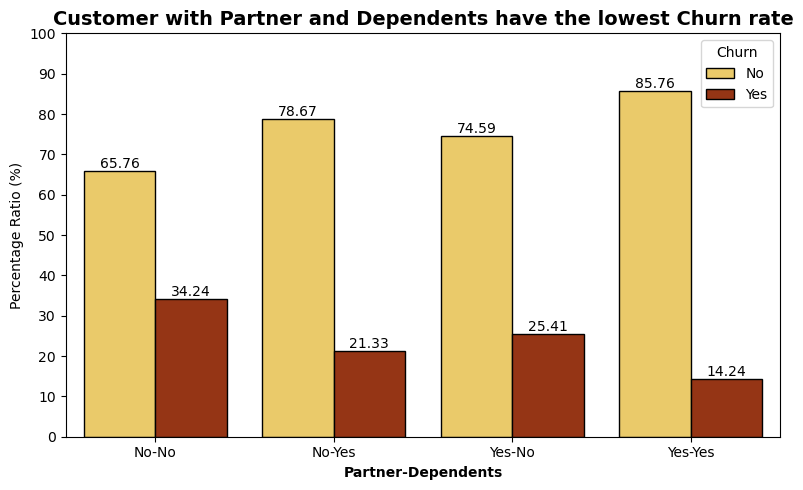

In [14]:
# create barplot

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.barplot(x = 'Partner Dependents', y = 'Percentage Ratio', data = pd_merge,
            hue = 'Churn', palette = 'afmhot_r', 
            lw = 1, ec = 'k')

ax.set_title('Customer with Partner and Dependents have the lowest Churn rate', fontsize = 14, weight = 'bold')
ax.set_ylabel('Percentage Ratio (%)')
ax.set_xlabel('Partner-Dependents', weight = 'bold')
ax.set_yticks(np.arange(0, 101, 10))

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa **tingkat persentase churn paling rendah** berada pada status pelanggan yang **menikah** dan **memiliki tanggungan**
(seperti mengurus anak atau anggota keluarga lainnya). Hal ini masuk akal karena penggunaan jasa telekomunikasi sangat
membantu keberlangsungan hidup keluarga dalam menjalankan kehidupan sehari-hari, seperti penemuhan kebutuhan pokok di era
modern yang hanya membutuhkan teknologi dan jaringan internet. Sebaliknya, **persentase churn terbesar** berada pada status
pelanggan yang **single** dan **tidak memiliki tanggungan**.

# Soal Hard

## 7. Buatlah insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut dengan memanfaatkan atribut tenure, contract, monthly charges, status*, jumlah pelanggan, dan churn!

Pelanggan banyak melakukan churn:

- Pada saat tenure berapa bulan?
- Term contract jenis apa yang dipilih oleh pelanggan?
- Status pelanggan seperti apa? Bagaimana persebarannya jika dilihat dari tenure pelanggan?
- Berapa monthly charges pelanggan? Apakah status berpengaruh pada monthly charges pelanggan?

Atribut status didapatkan dengan asumsi:
- Married : pelanggan adalah senior citizen atau memiliki partner atau memiliki dependents
- Single : tidak memiliki status seperti yang disebutkan diatas

In [15]:
# your code goes here!

df_h = df.copy()

# get status attribute
def cust_stat(row):
    if (row['SeniorCitizen'] == 1 or row['Partner'] == 'Yes' or row['Dependents'] == 'Yes') == True:
        return 'Married'
    return 'Single'

# get annual tenure
def tenure_year(x):
    if x < 12:
        return 'Under 1 year'
    elif x <= 36:
        return '1 - 3 years'
    return 'Over 3 years'
        

# add tenure year column
df_h['tenure year'] = df_h['tenure'].apply(lambda x: tenure_year(x))

# add Status column
df_h['Status'] = df_h.apply(lambda row: cust_stat(row), axis = 1)

df_h[['tenure', 'Contract', 'MonthlyCharges', 'Status', 'Churn', 'tenure year']].sample(10)

,tenure,Contract,MonthlyCharges,Status,Churn,tenure year
2613,1,Month-to-month,80.20,Single,Yes,Under 1 year
663,65,Two year,69.55,Married,No,Over 3 years
1338,1,Month-to-month,20.15,Single,Yes,Under 1 year
5349,69,Two year,114.35,Married,No,Over 3 years
5264,69,One year,29.80,Married,No,Over 3 years
4456,68,Two year,24.95,Married,No,Over 3 years
3380,1,Month-to-month,95.10,Married,Yes,Under 1 year
3007,32,Month-to-month,74.40,Married,Yes,1 - 3 years
4820,58,Two year,84.30,Married,No,Over 3 years
1750,50,Two year,89.70,Single,No,Over 3 years


## 7.1 Customer distribution by status and churn

In [16]:
# groupping total customer by Status and churn

status_churn = df_h.groupby(['Status', 'Churn']).agg({'customerID' : 'nunique'}).reset_index()
status_churn.columns = ['Status', 'Churn', 'Total Unique Customer']

status = df_h.groupby(['Status']).agg({'customerID' : 'nunique'}).reset_index()
status.columns = ['Status', 'All Total Unique Customer']

status_merge = status_churn.merge(status, how = 'inner', on = 'Status')

# add percentage ratio column

status_merge['Percentage Ratio'] = round((status_merge['Total Unique Customer']/status_merge['All Total Unique Customer'])*100, 2)
status_merge

,Status,Churn,Total Unique Customer,All Total Unique Customer,Percentage Ratio
0,Married,No,3302,4324,76.36
1,Married,Yes,1022,4324,23.64
2,Single,No,1872,2719,68.85
3,Single,Yes,847,2719,31.15


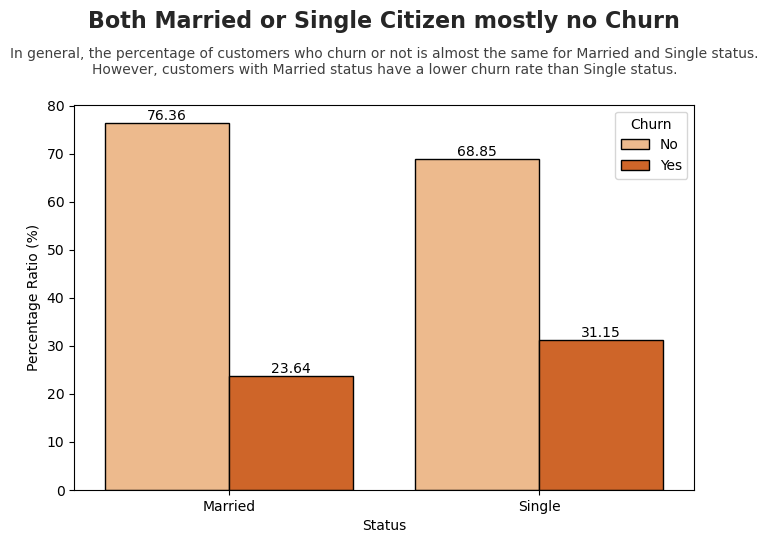

In [17]:
# create barplot

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.barplot(x = 'Status', y = 'Percentage Ratio', data = status_merge,
            hue = 'Churn', palette = 'Oranges', 
            lw = 1, ec = 'k')

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.2, 'Both Married or Single Citizen mostly no Churn', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.15, "In general, the percentage of customers who churn or not is almost the same for Married and Single status.\nHowever, customers with Married status have a lower churn rate than Single status.",
        ha = 'center', va ='top', fontsize = 10,  alpha = 0.75)

ax.set_ylabel('Percentage Ratio (%)')
ax.set_xlabel('Status')
ax.set_yticks(np.arange(0, 81, 10))

for i in ax.containers:
    ax.bar_label(i)

## 7.2 Customer distribution by contract, status and churn

In [18]:
# Count customers in the different contracts

index = df_h['Contract'].value_counts().index
values = df_h['Contract'].value_counts().values

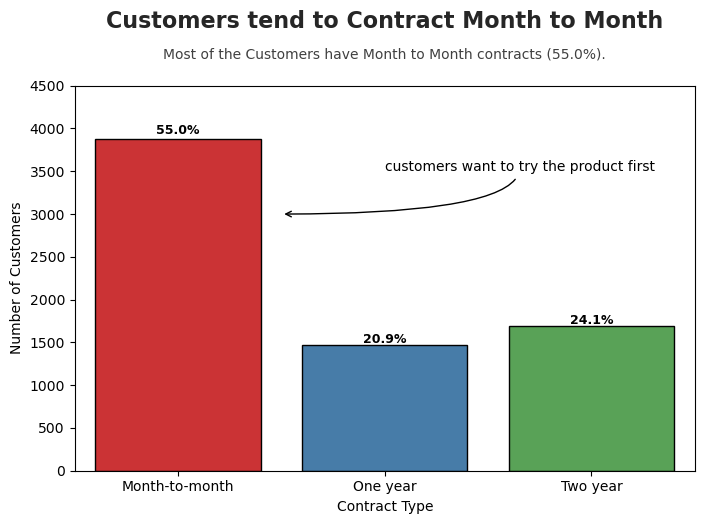

In [19]:
# create barplot

ls = ['Month-to-month','One year','Two year']

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.barplot(x = index, y = values, 
            palette = 'Set1', 
            order = ls, ax = ax, 
            lw = 1, edgecolor = 'k')

ax.set_xlabel('Contract Type')
ax.set_yticks(np.arange(0, 5000, 500))
ax.set_ylabel('Number of Customers')

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, 'Customers tend to Contract Month to Month', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.1, "Most of the Customers have Month to Month contracts (55.0%).",
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

ax.annotate('customers want to try the product first', xy = (0.5, 3000), xytext = (1, 3500),
            arrowprops = dict(arrowstyle = "->",
                              connectionstyle = "angle3,angleA=90,angleB=0"));

for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/len(df_h['Contract']))
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() * 1.015
    ax.annotate(percentage, (x, y), ha='center', size=9, color='black', weight = 'bold');

In [20]:
# Groupping total customer by Contract and Status

stat_co = df_h.groupby(['Status', 'Contract']).agg({'customerID' : 'nunique'}).reset_index()
stat_co.columns = ['Status', 'Contract', 'Total Unique Customer']

stat = df_h.groupby(['Status']).agg({'customerID' : 'nunique'}).reset_index()
stat.columns = ['Status', 'All Total Unique Customer']

stat_merge = stat_co.merge(stat, how = 'inner', on = 'Status')

# add percentage ratio column

stat_merge['Percentage Ratio'] = round((stat_merge['Total Unique Customer']/stat_merge['All Total Unique Customer'])*100, 2)

stat_merge

,Status,Contract,Total Unique Customer,All Total Unique Customer,Percentage Ratio
0,Married,Month-to-month,2041,4324,47.20
1,Married,One year,980,4324,22.66
2,Married,Two year,1303,4324,30.13
3,Single,Month-to-month,1834,2719,67.45
4,Single,One year,493,2719,18.13
5,Single,Two year,392,2719,14.42


In [21]:
# Groupping total customer by Contract and Churn

chu_co = df_h.groupby(['Churn', 'Contract']).agg({'customerID' : 'nunique'}).reset_index()
chu_co.columns = ['Churn', 'Contract', 'Total Unique Customer']

chu = df_h.groupby(['Churn']).agg({'customerID' : 'nunique'}).reset_index()
chu.columns = ['Churn', 'All Total Unique Customer']

chu_merge = chu_co.merge(chu, how = 'inner', on = 'Churn')

# add percentage ratio column

chu_merge['Percentage Ratio'] = round((chu_merge['Total Unique Customer']/chu_merge['All Total Unique Customer'])*100, 2)
chu_merge

,Churn,Contract,Total Unique Customer,All Total Unique Customer,Percentage Ratio
0,No,Month-to-month,2220,5174,42.91
1,No,One year,1307,5174,25.26
2,No,Two year,1647,5174,31.83
3,Yes,Month-to-month,1655,1869,88.55
4,Yes,One year,166,1869,8.88
5,Yes,Two year,48,1869,2.57


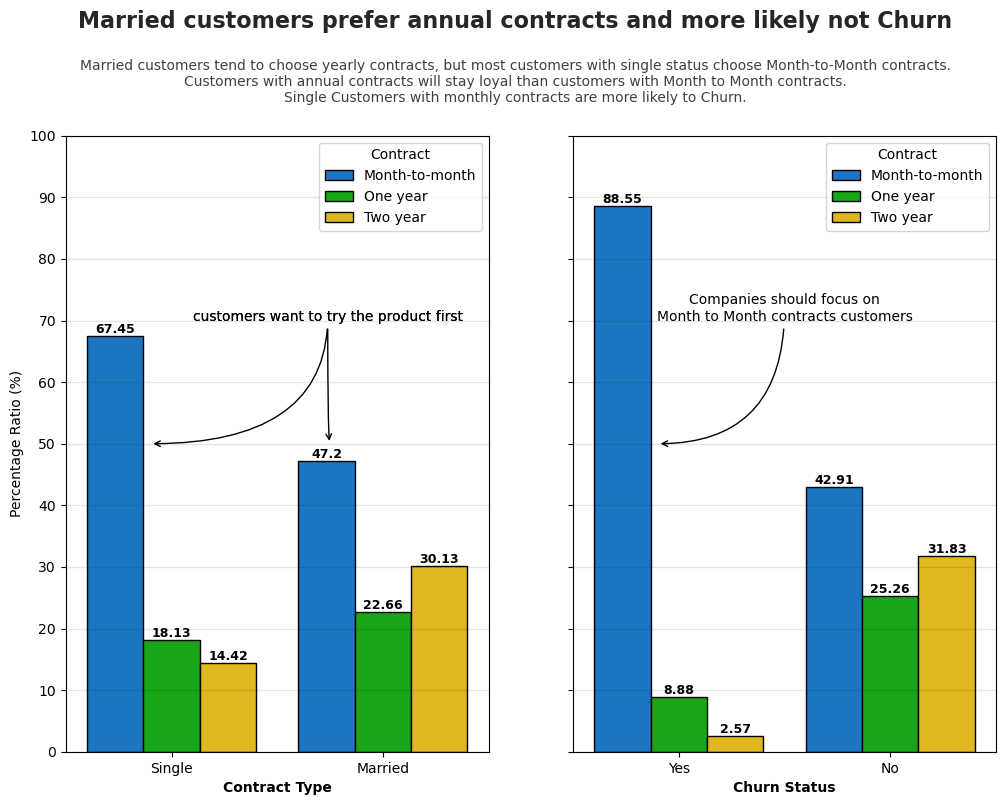

In [22]:
# create barplot

fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12, 8))

sns.barplot(x = 'Status', y = 'Percentage Ratio', data = stat_merge, 
            hue = 'Contract', palette = 'nipy_spectral', 
            order = ['Single','Married'], 
            lw = 1, edgecolor = 'k', 
            ax = ax[0])

sns.barplot(x = 'Churn', y = 'Percentage Ratio', data = chu_merge, 
            hue = 'Contract', palette = 'nipy_spectral', 
            order = ['Yes','No'],  
            lw = 1, edgecolor = 'k',
            ax = ax[1])

ax[0].set_ylabel('Percentage Ratio (%)')
ax[1].set_ylabel('')
ax[0].set_xlabel('Contract Type', weight = 'bold')
ax[1].set_xlabel('Churn Status', weight = 'bold')
ax[0].set_yticks(np.arange(0, 101, 10))

Xstart0, Xend0 = ax[0].get_xlim()
Ystart0, Yend0 = ax[0].get_ylim()

Xstart1, Xend1 = ax[1].get_xlim()
Ystart1, Yend1 = ax[1].get_ylim()

ax[0].text((Xstart0+Xend1)/2*(3.25), Yend0*1.175, 'Married customers prefer annual contracts and more likely not Churn', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax[0].text((Xstart1+Xend0)/2*(3.25), Yend0*1.125, "Married customers tend to choose yearly contracts, but most customers with single status choose Month-to-Month contracts.\nCustomers with annual contracts will stay loyal than customers with Month to Month contracts.\nSingle Customers with monthly contracts are more likely to Churn.",
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

ax[0].annotate('customers want to try the product first', xy = (-0.1, 50), xytext = (0.1, 70),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "angle3,angleA=90,angleB=0"))

ax[0].annotate('customers want to try the product first', xy = (0.75, 50), xytext = (0.1, 70),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "angle3,angleA=90,angleB=0"))

ax[1].annotate('Companies should focus on\nMonth to Month contracts customers', ha = 'center', xy=(-0.1, 50), xytext=(0.5, 70),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "angle3,angleA=90,angleB=0"))

for contain in ax[0].containers:
    ax[0].bar_label(contain, size=9, color='black', weight = 'bold')
    
for contain in ax[1].containers:
    ax[1].bar_label(contain, size=9, color='black', weight = 'bold')

ax[0].grid(color='black', linewidth=1, axis='y', alpha=0.1)
ax[1].grid(color='black', linewidth=1, axis='y', alpha=0.1)

## 7.3 Customer distribution by Tenure

In [23]:
# Split dataset by Churn and non-Churn

df_c_y = df_h[df_h.Churn == 'Yes']
df_c_n = df_h[df_h.Churn == 'No']

m = df_c_y.groupby('tenure year').agg({'customerID' : 'nunique'}).reset_index()
m.columns = ['Tenure Group', 'Total Unique Customer']

n = df_c_n.groupby('tenure year').agg({'customerID' : 'nunique'}).reset_index()
n.columns = ['Tenure Group', 'Total Unique Customer']

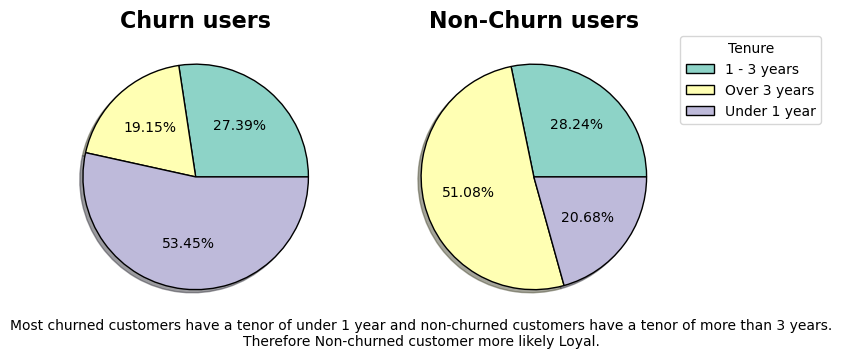

In [24]:
# create pie plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,10))

ax1.pie(m['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)

ax1.set_title('Churn users',
              ha = 'center', fontsize = 16, fontweight='bold')

ax2.pie(n['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)

ax2.set_title('Non-Churn users', 
              ha = 'center', fontsize = 16, fontweight='bold')

ax2.text(x = -1, y = -1.5, s = 'Most churned customers have a tenor of under 1 year and non-churned customers have a tenor of more than 3 years.\nTherefore Non-churned customer more likely Loyal.', 
         ha = 'center', fontsize = 10)

ax2.legend(labels = m['Tenure Group'], title = 'Tenure', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [25]:
df_tenure = pd.DataFrame(df_c_y.groupby(['tenure'])['Churn'].count()).reset_index()
df_tenure_group = pd.DataFrame(df_c_y.groupby(['tenure year'])['Churn'].count()).reset_index()

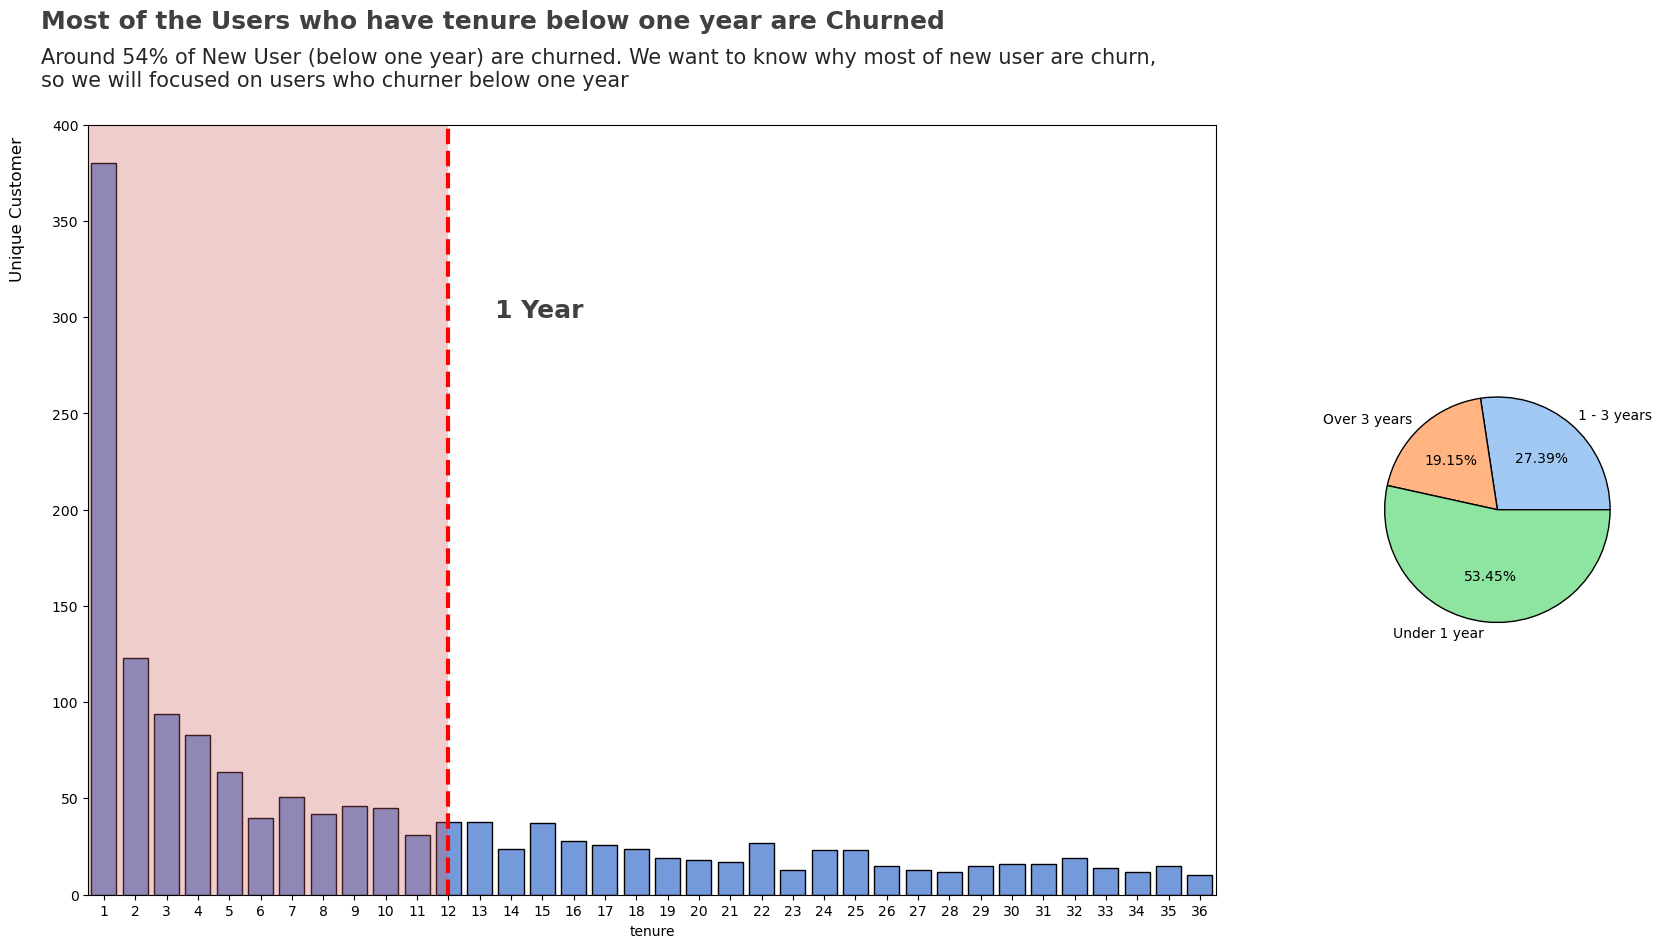

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [4, 1]})

# Plot graph
sns.barplot(x = "tenure", y = "Churn", data = df_tenure, 
            color = 'cornflowerblue', edgecolor = 'black', ax = ax[0])

ax[1].pie(df_tenure_group['Churn'], labels = df_tenure_group['tenure year'], colors = sns.color_palette('pastel'), 
          wedgeprops = {"edgecolor":"k"}, autopct = '%.2f%%')

ax[0].yaxis.label.set_visible(False)
ax[0].text(-3, 320, s = "Unique Customer", fontsize = 12, rotation = 90)
ax[0].set_ylim(0, 400)
ax[0].set_xlim(-0.5, 35.5)
ax[0].stackplot(np.arange(-0.5, 11.5 ,0.5), [[400]], colors = ('indianred',), alpha = 0.3)
ax[0].axvline(x = 11, c = 'red', ls = '--', lw = 3)

ax[0].text(x = -2, y = 450, 
           s = "Most of the Users who have tenure below one year are Churned", 
           fontsize = 18, weight = 'bold', alpha = 0.75)
ax[0].text(x = -2, y = 420, 
           s = 'Around 54% of New User (below one year) are churned. We want to know why most of new user are churn, \nso we will focused on users who churner below one year', 
           fontsize = 15, alpha = 0.85)
ax[0].text(x = 12.5, y = 300, 
           s = "1 Year", 
           fontsize = 18, weight = 'bold', alpha = 0.75)

plt.show()

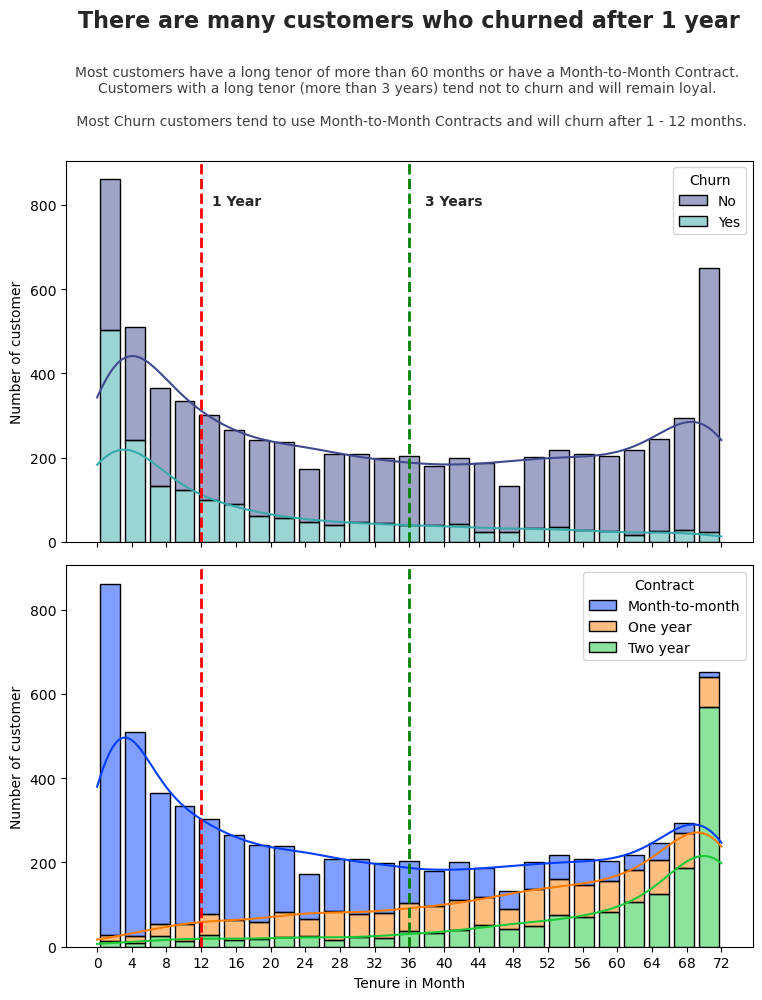

In [27]:
# Create histplot

fig, ax = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (8,10))

sns.histplot(x = 'tenure', data = df_h, 
             hue = 'Churn', palette = 'mako', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax[0])

ax[0].set_ylabel('Number of customer')
ax[0].set_xticks(np.arange(0, 74, 4))
ax[0].axvline(12, c = 'r', ls = '--', lw = 2)
ax[0].axvline(12*3, c = 'g', ls = '--', lw = 2)
ax[0].text(12*1.1, 800, s = '1 Year', weight = 'bold', alpha = 0.85)
ax[0].text(12*3*1.05, 800, s = '3 Years', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax[0].get_xlim()
Ystart, Yend = ax[0].get_ylim()

ax[0].text((Xstart+Xend)/2, Yend*1.35, 'There are many customers who churned after 1 year', 
           ha = 'center', fontsize = 16, fontweight = 'bold', alpha = 0.85)

ax[0].text((Xstart+Xend)/2, Yend*1.25, "Most customers have a long tenor of more than 60 months or have a Month-to-Month Contract. \nCustomers with a long tenor (more than 3 years) tend not to churn and will remain loyal. \n\n Most Churn customers tend to use Month-to-Month Contracts and will churn after 1 - 12 months.",
           ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

sns.histplot(x = 'tenure', data = df_h,
            hue = 'Contract', palette = 'bright', 
            kde = True, multiple = 'stack', 
            bins = 25, shrink = 0.8, 
            ax = ax[1])

ax[1].set_ylabel('Number of customer')
ax[1].set_xlabel('Tenure in Month')
ax[1].axvline(12, c = 'r', ls = '--', lw = 2)
ax[1].axvline(12*3, c = 'g', ls = '--', lw = 2)

plt.tight_layout()

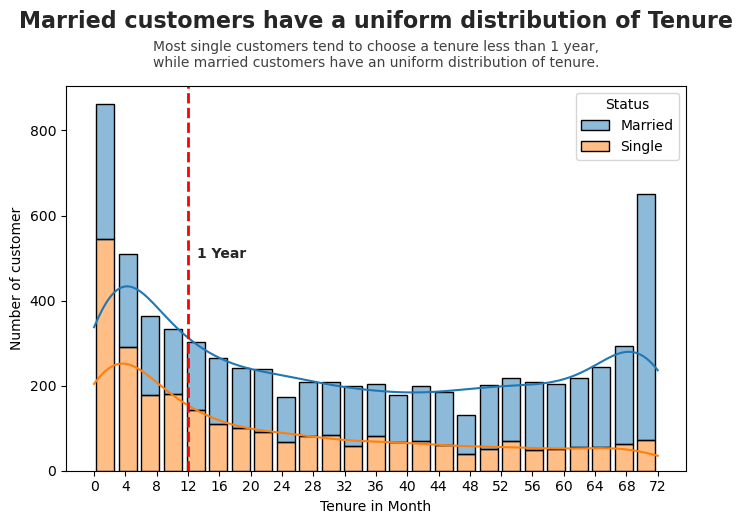

In [28]:
# Create histplot

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.histplot(x = 'tenure', data = df_h, hue = 'Status', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Tenure in Month')
ax.set_xticks(np.arange(0, 74, 4))
ax.axvline(12, color = 'r', linestyle = '--', lw = 2)
ax.text(12*1.1, 500, s = '1 Year', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, 'Married customers have a uniform distribution of Tenure', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "Most single customers tend to choose a tenure less than 1 year,\nwhile married customers have an uniform distribution of tenure.", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

## 7.4 Customer distribution by monthly charges

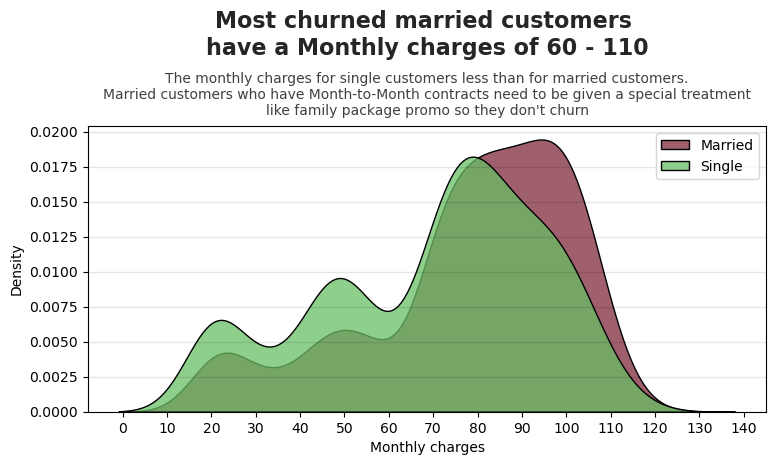

In [29]:
# create kdeplot of monthly charges
# Select only churn customers

fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.kdeplot(x = 'MonthlyCharges', data = df_c_y[df_c_y.Status == 'Married'], label = 'Married', 
            color = '#7F2A3C', fill = True, multiple = 'stack', ax = ax)

sns.kdeplot(x = 'MonthlyCharges', data = df_c_y[df_c_y.Status == 'Single'], label = 'Single', 
            color = '#69bf64', fill = True, multiple = 'stack', ax = ax)

ax.grid(color='black', linewidth=1, axis='y', alpha=0.1)
ax.set_xlabel('Monthly charges')
ax.set_xticks(np.arange(0, 141, 10))
ax.legend()

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.25, 'Most churned married customers \nhave a Monthly charges of 60 - 110', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.19, "The monthly charges for single customers less than for married customers.\nMarried customers who have Month-to-Month contracts need to be given a special treatment\nlike family package promo so they don't churn",
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.tight_layout()